<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_one/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

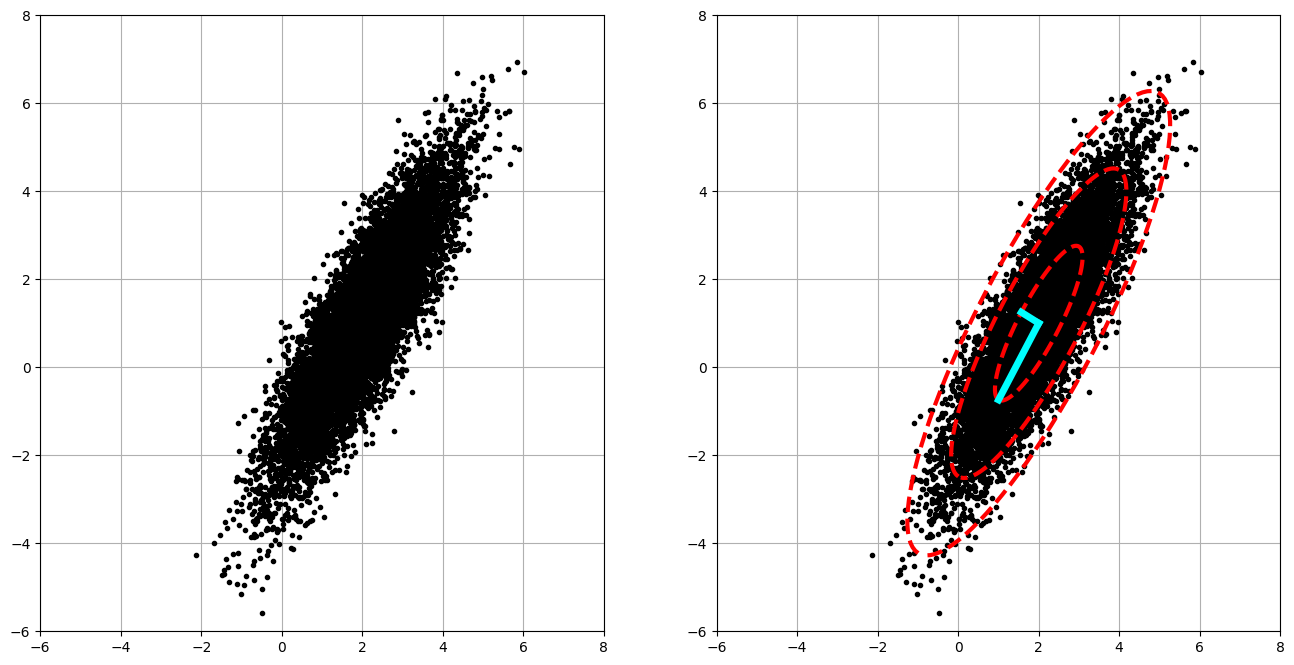

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the center and scale of the data
data_center = np.array([2, 1])
scale = np.array([2, 0.5])

# Define the rotation angle (theta) in radians
rotation_angle = np.pi / 3

# Create a rotation matrix
rotation_matrix = np.array([
    [np.cos(rotation_angle), -np.sin(rotation_angle)],
    [np.sin(rotation_angle), np.cos(rotation_angle)]
])

# Number of points to generate
num_points = 10000

# Generate random data and apply the transformation
random_data = np.random.randn(2, num_points)
scaled_data = np.diag(scale) @ random_data
rotated_data = rotation_matrix @ scaled_data
transformed_data = np.diag(data_center) @ np.ones((2, num_points)) + rotated_data

# Create the first subplot to show the transformed data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(transformed_data[0, :], transformed_data[1, :], '.', color='black')
ax1.grid()
ax1.set_xlim((-6, 8))
ax1.set_ylim((-6, 8))

# Compute the mean of the data
data_mean = np.mean(transformed_data, axis=1)

# Subtract the mean from the data
mean_subtracted_data = transformed_data - np.tile(data_mean, (num_points, 1)).T

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(mean_subtracted_data / np.sqrt(num_points), full_matrices=False)

# Plot the original data in the second subplot
ax2.plot(transformed_data[0, :], transformed_data[1, :], '.', color='black')
ax2.grid()
ax2.set_xlim((-6, 8))
ax2.set_ylim((-6, 8))

# Define a circle for the confidence interval
theta = 2 * np.pi * np.arange(0, 1, 0.01)
circle = np.array([np.cos(theta), np.sin(theta)])

# Plot confidence intervals and principal components
for i in range(1, 4):
    confidence_interval = U @ np.diag(S) @ circle * i
    ax2.plot(data_mean[0] + confidence_interval[0, :],
             data_mean[1] + confidence_interval[1, :],
             '--', color='red', linewidth=3)

# Plot principal components
for i in range(2):
    ax2.plot([data_mean[0], data_mean[0] + U[0, i] * S[i]],
             [data_mean[1], data_mean[1] + U[1, i] * S[i]],
             '-', color='cyan', linewidth=5)

# Display the plot
plt.show()
